# Clustering 과제

#### 개요
Clustering 해보기\
1) Preprocessing / EDA\
2) Clustering
    * Hierarchical agglomerative Clustering, K-Means Clustering, DBSCAN, …
3) Evaluation

#### 데이터 출처

강의자님 제공 (Mall_Customers)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 

In [2]:
data = pd.read_csv('Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Gender                    200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


* 감사히도 결측치는 없고 성별, 나이, 소득, 지출 점수를 가지고 클러스터링을 할 수 있을 것 같아요

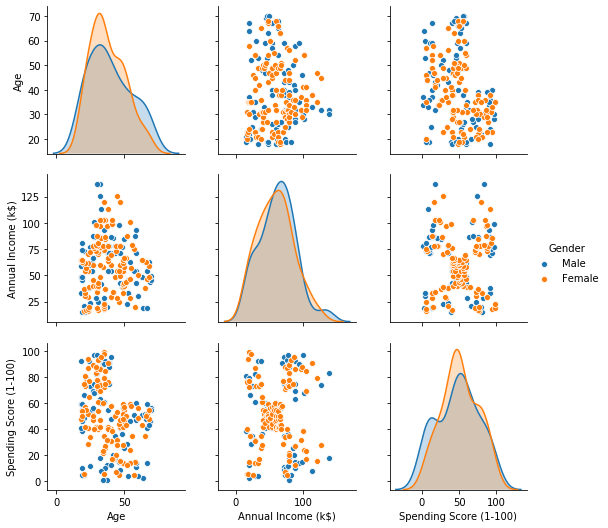

In [5]:
data = data.drop(columns=['CustomerID'])
sns.pairplot(data, hue="Gender")
plt.show()

* ID는 필요없으므로 삭제했고 성별에 따라 분포를 보았는데 큰 차이는 없어보입니다.

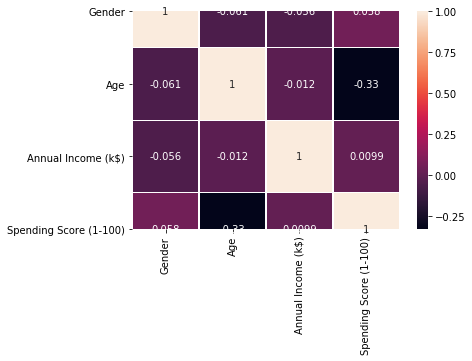

In [6]:
data['Gender'].replace(['Male','Female'],[0,1],inplace=True)
sns.heatmap(data.corr(),annot=True,linewidths=0.2) 
fig=plt.gcf()
plt.show()

* 나이가 많을 수록 지출이 많을 줄 알았는데 꼭 그렇지만은 않습니다

## Hierarchical agglomerative clustering 

In [7]:
X = data[['Annual Income (k$)','Spending Score (1-100)']]
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


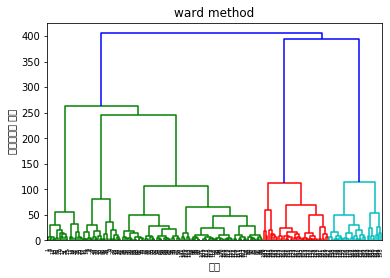

In [8]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('ward method')
plt.xlabel('고객')
plt.ylabel('유클리디안 거리')
plt.show()

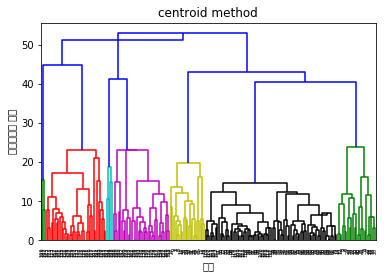

In [9]:
dendrogram = sch.dendrogram(sch.linkage(X, method = 'centroid'))
plt.title('centroid method')
plt.xlabel('고객')
plt.ylabel('유클리디안 거리')
plt.show()

* centroid : 군집의 중심점을 비교하는 것
* ward : 두 군집의 중심거리 - 각 군집 자체의 중심 거리

wards method의 경우 데이터들을 하나의 군집으로 묶음으로써 생기는 정보의 손실을 측정할 수 있다는 특징이 있습니다.

## 평가

* Davies_bouldin_score: 높은 클러스터 내 유사도를 가지고 낮은 클러스터간 유사도를 가지는 클러스터들을 생성하는 클러스터링 알고리즘은 낮은 index 값을 가지게 된다. 따라서, 이 지표가 낮은 클러스터링 알고리즘이 좋은 클러스터링 알고리즘으로 평가된다.
* Silhouette Coefficient: 1에 가까울 수록 데이터 데이터 i 는 올바른 클러스터에 분류된 것이며, -1에 가까울 수록 잘못된 클러스터에 분류되었음을 나타낸다.

## Agglomerative clustering

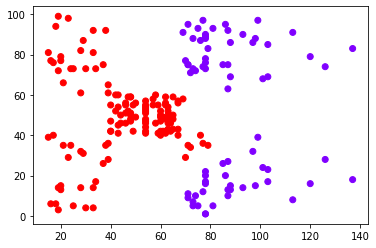

Silhouette Coefficient:  0.36706444723912895
Davies_bouldin_score:  1.3734011244003579


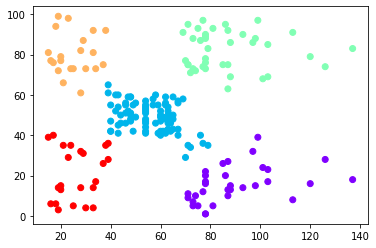

Silhouette Coefficient:  0.5529945955148897
Davies_bouldin_score:  0.5782207452369452


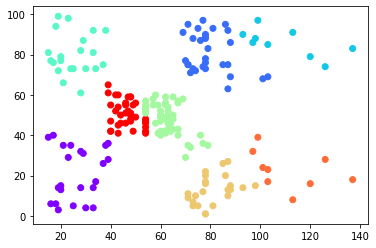

Silhouette Coefficient:  0.4326286245782246
Davies_bouldin_score:  0.7730869541324263


In [10]:
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering

li = [2,5,8]
for i in li:
    agg = AgglomerativeClustering(n_clusters=i, affinity='euclidean', linkage='ward').fit(X)
    labels = agg.labels_
    plt.scatter(X['Annual Income (k$)'],X['Spending Score (1-100)'], c=labels, cmap='rainbow')
    plt.show()
    
    print('Silhouette Coefficient: ', metrics.silhouette_score(X, labels, metric='euclidean'))
    print('Davies_bouldin_score: ', metrics .davies_bouldin_score(X, labels))

* 클러스터 개수를 하이퍼 파라미터로 지정해줄 수 있습니다. 5가 가장 평가지표가 좋네요

## K-Means

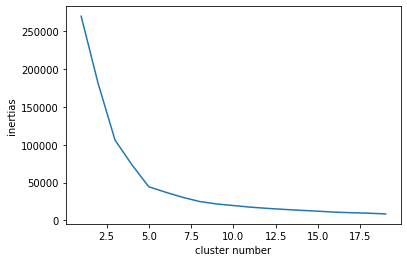

In [11]:
from sklearn.cluster import KMeans
inertias = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)
plt.plot(range(1, 20), inertias)
plt.xlabel('cluster number')
plt.ylabel('inertias')
plt.show()

* 5가 elbow point로 가장 이상적인 개수로 보입니다.

Silhouette Coefficient:  0.553931997444648
Davies_bouldin_score:  0.5725628995597086


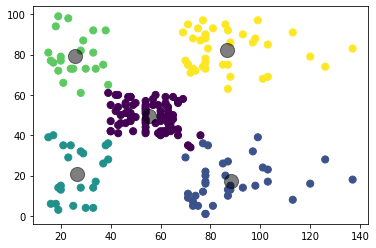

In [12]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
kmeans.fit(X)
label = kmeans.labels_
y_kmeans = kmeans.predict(X)
centers = kmeans.cluster_centers_
plt.scatter(X['Annual Income (k$)'],X['Spending Score (1-100)'], c=y_kmeans, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)


print('Silhouette Coefficient: ', metrics.silhouette_score(X, label, metric='euclidean'))
print('Davies_bouldin_score: ', metrics .davies_bouldin_score(X, label))

## Mean-Shift

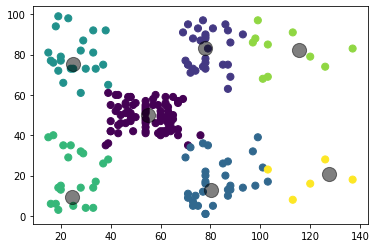

Silhouette Coefficient:  0.5276927755500117
Davies_bouldin_score:  0.6626903496266008


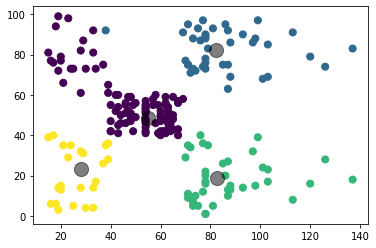

Silhouette Coefficient:  0.49013162285715894
Davies_bouldin_score:  0.7133569294264996


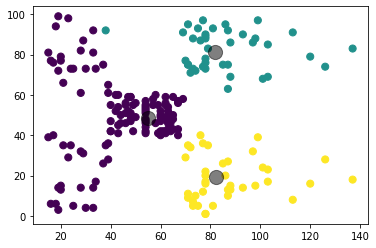

Silhouette Coefficient:  0.4649831662238108
Davies_bouldin_score:  0.7222778803735718


In [13]:
from sklearn.cluster import MeanShift, estimate_bandwidth
li = [10,100,500]
for i in li:
    bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=i)
    ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
    ms.fit(X)
    labels = ms.labels_
    cluster_centers = ms.cluster_centers_

    plt.scatter(X['Annual Income (k$)'],X['Spending Score (1-100)'], c=labels, s=50, cmap='viridis')
    plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='black', s=200, alpha=0.5);
    plt.show()
    
    print('Silhouette Coefficient: ', metrics.silhouette_score(X, labels, metric='euclidean'))
    print('Davies_bouldin_score: ', metrics .davies_bouldin_score(X, labels))

* Mean Shift는 어떤 데이터 분포의 peak 또는 무게중심을 찾는 한 방법으로서, 현재 자신의 주변에서 가장 데이터가 밀집된 방향으로 이동한다. 그러다 보면 언젠가는 분포 중심을 찾을 수 있을 거라는 방법이다. 
* bandwidth = distance/size scale of the kernel function
* estimate_bandwith로 파라미터에 따라 클러스터 수를 결정해주고 있습니다. 

## DBSCAN

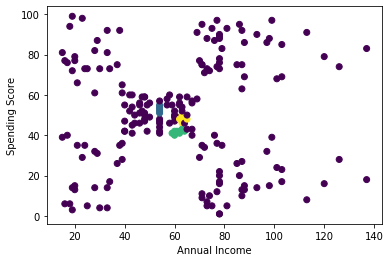

Silhouette Coefficient:  -0.3384933492468103
Davies_bouldin_score:  7.0271545744774775


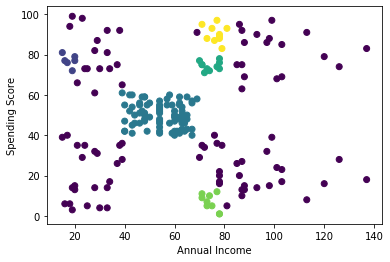

Silhouette Coefficient:  0.1135163893571667
Davies_bouldin_score:  2.5520714073233335


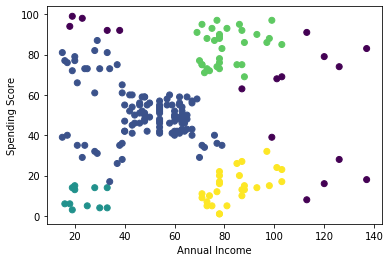

Silhouette Coefficient:  0.41249187303464097
Davies_bouldin_score:  1.8373836077719914


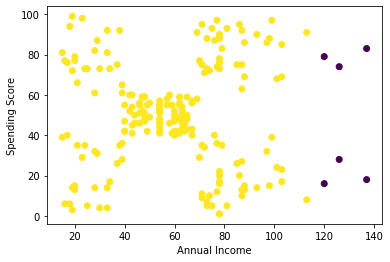

Silhouette Coefficient:  0.42080030703350696
Davies_bouldin_score:  0.8591138851241792


In [14]:
from sklearn.cluster import DBSCAN
li = [2,5,10,15]
for i in li:
    db = DBSCAN(eps=i, min_samples=5).fit(X)
    cluster = db.fit_predict(X)
    label = db.labels_
    plt.scatter(x = X['Annual Income (k$)'],y = X['Spending Score (1-100)'], c=cluster)
    plt.xlabel("Annual Income")
    plt.ylabel("Spending Score")
    plt.show()
    
    print('Silhouette Coefficient: ', metrics.silhouette_score(X, label, metric='euclidean'))
    print('Davies_bouldin_score: ', metrics .davies_bouldin_score(X, label))

* eps를 어떻게 정하느냐에 따라 상당히 다른 모습을 보이고 있습니다.
